# Runs the Heat Pump Model for Multiple Scenaries across Multiple Communities

In [1]:
import sys
import numpy as np
import pandas as pd
import qgrid

sh = lambda df: qgrid.show_grid(df, show_toolbar=False)

# import matplotlib pyplot commands
from matplotlib.pyplot import *
 
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

#---- Auto-reload of modules
%load_ext autoreload
%autoreload 2

#---- Altair imports 
import altair as alt
alt.data_transformers.enable('json');   # keeps Huge data out of Notebook

## Loop through Cities Running all Scenarios

In [2]:
# Bring the heat pump calculator into the Python Path.
# This assumes that the heat-pump-calc project is present and on
# the same directory level as this heat-pump-study project.
sys.path.insert(0, '../../heat-pump-calc')
import heatpump.library as lib
import heatpump.hp_model as hpmod

In [3]:
in_base = dict(
    pce_limit=500,
    co2_lbs_per_kwh=1.5,
    exist_fuel_use=None,
    exist_heat_effic=0.8,
    exist_kwh_per_mmbtu=6.25,
    includes_dhw=False,
    includes_dryer=False,
    includes_cooking=False,
    occupant_count=3,
    hp_model_id=-1,
    low_temp_cutoff=5,
    off_months_chks=[],
    garage_stall_count=1,
    garage_heated_by_hp=False,
    indoor_heat_setpoint=70,
    insul_level=2,
    pct_exposed_to_hp=0.46,
    doors_open_to_adjacent=True,
    bedroom_temp_tolerance='med',
    rebate_dol=0,
    pct_financed=0,
    loan_term=10,
    loan_interest=0.05,
    hp_life=14,
    op_cost_chg=0,
    discount_rate=0.05,
    inflation_rate=0.02,
    fuel_esc_rate=0.03,
    elec_esc_rate=0.02,
)

# Inputs that need to be determined for each community
# city_id
# utility
# bldg_floor_area
# exist_unit_fuel_cost
# elec_use_jan
# elec_use_may
# capital_cost,
# sales_tax,

In [4]:
in_test = in_base.copy()
in_test['city_id'] = 1
in_test['utility'] = lib.util_from_id(53)
in_test['bldg_floor_area'] = 1700
in_test['exist_heat_fuel_id'] = 4     # 4 - #1 Oil, 3 - Propane, 1 - Electricity
in_test['exist_unit_fuel_cost'] = 2.69
in_test['elec_use_jan'] = 674
in_test['elec_use_may'] = 503
in_test['capital_cost'] = 4000
in_test['sales_tax'] =  0.06

In [5]:
mod = hpmod.HP_model(**in_test)
mod.run()
mod.summary

{'fuel_unit': 'gallon',
 'fuel_desc': '#1 Oil',
 'design_heat_load': 27137.998944,
 'design_heat_temp': -2.9200000000000017,
 'cop': 2.768709522701937,
 'hp_max_capacity_5F': 13309.359,
 'max_hp_reached': True,
 'co2_lbs_saved': 2599.0911896777543,
 'co2_driving_miles_saved': 2914.2073439908268,
 'hp_load_frac': 0.7482128214632623,
 'irr': -0.024994180498934093,
 'npv': -1918.8347917250733,
 'fuel_use_base': 650.4120176530662,
 'fuel_use_hp': 166.36443331460313,
 'fuel_use_chg': -484.047584338463,
 'fuel_price_incremental': 2.8514000000000004,
 'elec_use_base': 6567.626453242359,
 'elec_use_hp': 11989.447440876997,
 'elec_use_chg': 5421.820987634637,
 'elec_rate_avg_base': 0.2744137409227546,
 'elec_rate_avg_hp': 0.2568969450238375,
 'elec_rate_incremental': 0.23567828576080543}

In [6]:
lib.city_from_id(1)

Name                                                         Anchorage
Latitude                                                        61.152
Longitude                                                     -149.864
ERHRegionID                                                          2
WAPRegionID                                                          2
ImpCost                                                              1
FuelRefer                                                        False
FuelCityID                                                         NaN
Oil1Price                                                         3.08
Oil2Price                                                          NaN
PropanePrice                                                       4.5
BirchPrice                                                         325
SprucePrice                                                        345
CoalPrice                                                          175
SteamP

In [7]:
lib.util_from_id(2)

ID                                                              2
Name                                 Anchorage ML&P - Residential
Active                                                       True
Type                                                            1
IsCommercial                                                False
ChargesRCC                                                   True
PCE                                                           NaN
CO2                                                           1.1
CustomerChg                                                 13.62
DemandCharge                                                  NaN
NameShort                                                  Anchor
Blocks          [(nan, 0.17457800125703232), (nan, nan), (nan,...
Name: 2, dtype: object

In [8]:
# Maps Census Area to average size of home.  Comes from the 2018 AHFC
# Housing Assessment.
census_to_size = {
 'Anchorage municipality': 2057,
 'Aleutians West Census Area': 1130,
 'Aleutians East Borough': 1296,
 'Yukon-Koyukuk Census Area': 947,
 'Hoonah-Angoon Census Area': 1258,
 'Bethel Census Area': 950,
 'Juneau City and Borough': 1725,
 'North Slope Borough': 1164,
 'Southeast Fairbanks Census Area': 1745,
 'Matanuska-Susitna Borough': 1912,
 'Denali Borough': 1736,
 'Lake and Peninsula Borough': 1026,
 'Valdez-Cordova Census Area': 1781,
 'Prince of Wales-Hyder Census Area': 1246,
 'Kenai Peninsula Borough': 1890,
 'Northwest Arctic Borough': 920,
 'Nome Census Area': 1168,
 'Wade Hampton Census Area': 834,
 'Dillingham Census Area': 1150,
 'Bristol Bay Borough': 1445,
 'Haines Borough': 1730,
 'Yakutat City and Borough': 1116,
 'Skagway Municipality': 1672,
 'Sitka City and Borough': 1629,
 'Wrangell City and Borough': 1766,
 'Petersburg Borough': 1714,
 'Ketchikan Gateway Borough': 1734,
 'Kodiak Island Borough': 1790,
 'Fairbanks North Star Borough': 2068,
}

In [13]:
def find_util(city, name_part):
    """Returns the first electric utility that has a name containing 'name_part', insensitive
    to capitalization.  If no utilities match, returns the first utility listed for 
    'city'. Returns None if there are no utilities for the city. 
    """
    utils = city.ElecUtilities
    if len(utils) == 1:
        return lib.util_from_id(utils[0][1])
    if len(utils) == 0:
        return None
    else:
        for util_name, util_id in utils:
            if name_part.lower() in util_name.lower():
                return lib.util_from_id(util_id)
        return lib.util_from_id(utils[0][1])
                
def scenarios(city_id, fuel_id):
    '''Returns a list of (scenario name, input dictionary) tuples for all 
    of the scenarios being modeled for 'city_id' with the existing system
    using 'fuel_id'.
    '''
    scenarios = []
    city = lib.city_from_id(city_id)
    
    # Base Case
    sc_base = in_base.copy()
    sc_base['city_id'] = city_id
    sc_base['exist_heat_fuel_id'] = fuel_id

    # Capital Cost
    # Each cost level is the same percentage above the one prior.
    # Assume highest level (level 5) is 1.6 x lowest level.
    cost_mult = 1.6 ** 0.25
    sc_base['capital_cost'] = 4000.0 * cost_mult ** (city.ImpCost - 1)
    
    # Find the residential utility for this city
    sc_base['utility'] = find_util(city, 'resid')
    
    # Building Floor Area
    sc_base['bldg_floor_area'] = census_to_size[city.census_area]
    
    # fuel price
    the_fuel = lib.fuel_from_id(fuel_id)
    price_col = the_fuel['price_col']
    price = np.nan_to_num(city[price_col])
    sc_base['exist_unit_fuel_cost'] = price
    
    # January and May electricity use
    sc_base['elec_use_jan'] = city.avg_elec_usage[0]
    sc_base['elec_use_may'] = city.avg_elec_usage[4]
    
    # Sales Tax
    sc_base['sales_tax'] = np.nan_to_num(city.MunicipalSalesTax) + np.nan_to_num(city.BoroughSalesTax)
    
    scenarios.append(('Base', sc_base))
    return scenarios
    
sc_count = 0
recs = []
for city_name, city_id in lib.cities():
    print(city_name)
    city = lib.city_from_id(city_id)
    
    for fuel_id in (4, 3, 1):
        for scenario_name, inp in scenarios(city_id, fuel_id):

            # If no utility for the scenario or no fuel price, skip it
            if (inp['utility'] is None) or (inp['exist_unit_fuel_cost']==0.0):
                continue

            rec = {
                'City': city_name,
                'Exist_Fuel_Type': fuel_id,
                'Scenario': scenario_name,
                'Census_Area': city.census_area,
                'ANCSA_Region': city.ancsa_region,
                'Util_Name': inp['utility'].Name, 
                'Sq_Ft': inp['bldg_floor_area'],
                'Capital_Cost': inp['capital_cost'],
                'Elec_Use_Jan': inp['elec_use_jan'],
                'Elec_Use_May': inp['elec_use_may'],
            }

            md = hpmod.HP_model(**inp)
            md.run()
            smy = md.summary
            rec.update(
                 Design_Heat_Load = smy['design_heat_load'],
                 Design_Heat_Temp = smy['design_heat_temp'],
                 COP = smy['cop'],
                 Max_HP_Cap_Reached = smy['max_hp_reached'],
                 HP_Load_Frac = smy['hp_load_frac'],
                 IRR = smy['irr'],
                 NPV = smy['npv'],
                 Fuel_Use_Chg = smy['fuel_use_chg'],
                 Fuel_Price_Incremental = smy['fuel_price_incremental'],
                 Elec_Use_Chg = smy['elec_use_chg'],
                 Elec_Rate_Incremental = smy['elec_rate_incremental'],            
            )
            recs.append(rec)
            sc_count += 1
print(sc_count)
df_results = pd.DataFrame(recs)
df_results.to_pickle('results.pkl')

Adak
Akhiok
Akiachak
Akiak
Akutan
Alakanuk
Alatna
Aleknagik
Allakaket
Anaktuvuk Pass - C
Anaktuvuk Pass Res
Anchor Point
Anchorage
Anderson
Angoon
Aniak
Anvik
Arctic Village
Atka
Atmautluak
Atqasuk - Com
Atqasuk - Res
Auke Bay
Beaver
Bethel
Bettles
Big Lake
Birch Creek
Bird Creek
Brevig Mission
Buckland
Cantwell
Central
Chalkyitsik
Chefornak
Chenega
Chevak
Chickaloon
Chicken
Chignik
Chignik Lake
Chiniak
Chistochina
Chitina
Chuathbaluk
Chugiak
Circle
Clam Gulch
Clark's Point
Clear
Coffman Cove
Cold Bay
Cooper Landing
Copper Center
Cordova
Craig
Crooked Creek
Deering
Delta Junction
Denali Nat'l Park
Dillingham
Diomede
Dot Lake
Douglas
Dutch Harbor
Eagle
Eagle River
Eek
Egegik
Ekwok
Elfin Cove
Elim
Emmonak
English Bay/Nanwal
Ester
Evansville
Eyak
Fairbanks
False Pass
Faribanks - Chena Ridge
Fort Yukon
Gakona
Galena
Gambell
Girdwood
Glennallen
Golovin
Goodnews Bay
Grayling
Gulkana
Gustavus
Haines
Healy
Hollis
Holy Cross
Homer
Hoonah
Hooper Bay
Hope
Houston
Hughes
Huslia
Hydaburg
Igiugig
Il

In [14]:
sh(df_results)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

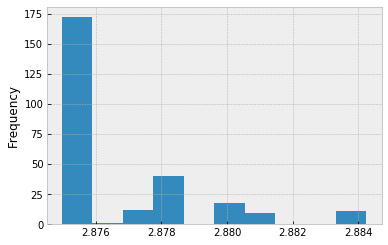

In [39]:
df_results.cop.plot.hist()

## Test out Plotting

In [17]:
df_test = pd.DataFrame({'Val': [-3500, -2000, -1900, 1230., 2420., 4560., 5230],
                        'Scenario': ['a', 'b', 'c', 'd', 'e', 'f', 'g']})
df_test['City'] = 'Kotzebue'
df_test['Econ'] = 'Close'
df_test.loc[df_test.Val < -2000, 'Econ'] =  'Not Economic'
df_test.loc[df_test.Val > 0, 'Econ'] =  'Economic'
df_test2 = df_test.copy()
df_test2['Val'] -= 300
df_test2['City'] = 'Ambler'
df_test2['Econ'] = 'Close'
df_test2.loc[df_test2.Val < -2000, 'Econ'] =  'Not Economic'
df_test2.loc[df_test2.Val > 0, 'Econ'] =  'Economic'
df_test = pd.concat([df_test, df_test2])

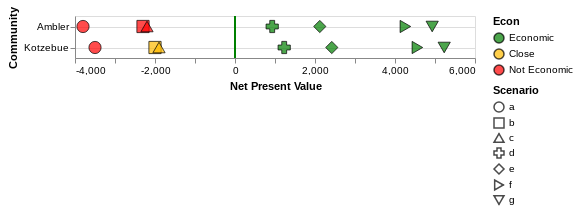

In [19]:
# make a color scale for economic payback
color_scale = alt.Scale(
            domain=['Economic', 'Close', 'Not Economic'],
            range=['green', '#FFBB00', 'red'])

main = alt.Chart(df_test).mark_point(
    size=150, opacity=0.7, stroke='black', strokeWidth=1
).encode(
    x=alt.X('Val', axis=alt.Axis(title='Net Present Value', grid=False)),
    y=alt.Y('City', axis=alt.Axis(title='Community', grid=True)),
    shape='Scenario',
    color=alt.Color('Econ', scale=color_scale),
    fill=alt.Color('Econ', scale=color_scale),
    tooltip=['Scenario']
)
rule_data = pd.DataFrame([{"ThresholdValue": 0, "Threshold": "breakeven"}])
rule = alt.Chart(rule_data).mark_rule(color='green').encode(
    x='ThresholdValue',
    size=alt.value(2)
)
(rule + main).interactive()

In [9]:
import logging
logging.root.setLevel(logging.DEBUG)
logging.root.getEffectiveLevel(), logging.DEBUG

(10, 10)